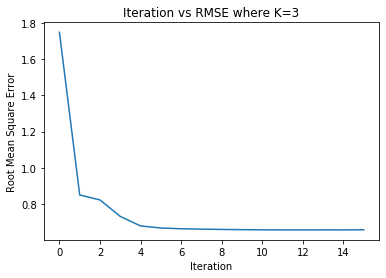

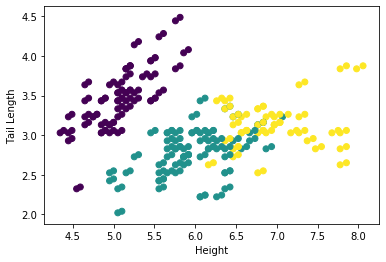

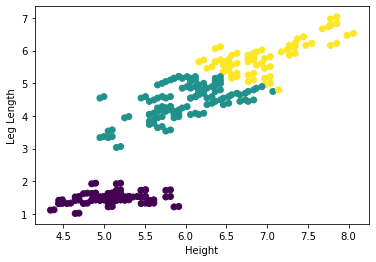

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random

def main():
    dataset = pd.read_csv("CMP3751M_CMP9772M_ML_Assignment 1_Task2 - dataset - dog breeds.csv", header=None)
    dataset = np.array(dataset)
    dataset = np.delete(dataset, 0, axis=0) #Remove the column headings 
    dataset = dataset.astype(np.float) #Convert from a string array to a float array
    k = 3

    centroids, cluster_assigned, RMSErrors = kmeans(dataset, k)
    plt.plot(RMSErrors)
    plt.xlabel("Iteration")
    plt.ylabel("Root Mean Square Error")
    plt.title("Iteration vs RMSE where K=3")
    plt.show()
    
    #plt.scatter(dataset[:,0], dataset[:,1], c=cluster_assigned, edgecolors="black")
    #plt.scatter(dataset[:,2], dataset[:,3], c=cluster_assigned, edgecolors="green")
    plt.scatter(dataset[:,0], dataset[:,1], c=cluster_assigned)
    plt.xlabel("Height")
    plt.ylabel("Tail Length")
    plt.figure()
    plt.scatter(dataset[:,0], dataset[:,2], c=cluster_assigned)
    plt.xlabel("Height")
    plt.ylabel("Leg Length")
    
def compute_euclidean_distance(vec_1, vec_2): #Distance between two arrays of equal size
    xMinusY = vec_1 - vec_2 #Diference between the two vectors
    distance = math.sqrt(sum(np.square(xMinusY))) #Euclidean distance
    return distance

def initialise_centroids(dataset, k):
    centroidsArray = []
    for i in range(k): #Generating k ammount of random centroids
        centroid = []
        for j in range(len(dataset[0])): #One random value generated for each perameter
            centroid.append(random.uniform(dataset[:,j].min(),dataset[:,j].max()))
        centroidsArray.append(centroid)
    return centroidsArray

def kmeans(dataset, k):
    centroids = initialise_centroids(dataset, k) #Centroids are initilised at random
    past_clusters = [] #Used to check if the clusters are the same as before, to check for convergence
    cluster_assigned = ["nothing"] #The cluster each datapoint is assigned to 
                                #(must start different to past_clusters to get past the first convergence check)
    RMSErrors = []
    
    while(not(np.array_equal(past_clusters,cluster_assigned))): #Repeats until convergence
        totalDistances = 0
        past_clusters = np.copy(cluster_assigned)
        cluster_assigned = []
        clusterTotals = np.copy(centroids)
        #Loop to assign each data point to a cluster (the closest centroid)
        for i in range(len(dataset)):
            distances = []
            for j in range(k):
                #Distance between datapoint i and centroid j
                distance = compute_euclidean_distance(dataset[:][i], centroids[j])
                distances.append(distance)
            closestCentroid = np.argmin(distances) #Closest centroid is chosen
            
            #Total distances is recorded to evaluate performance later using RMSE
            totalDistances += distances[np.argmin(distances)]
            
            cluster_assigned.append(closestCentroid)
            #Totaling the associated points for calculating new centroids
            clusterTotals[closestCentroid] += dataset[:][i]
        #New centroid location is calculated (the mean of its associated data points)    
        clusterTotals -= centroids
        for i in range(k):    
            clusterTotals[i] /= cluster_assigned.count(i)
        centroids = np.copy(clusterTotals)
        
        RMSErrors.append(totalDistances/len(dataset))
        
    return centroids, cluster_assigned, RMSErrors

main()